In [50]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yasserh/twitter-tweets-sentiment-dataset")

print("Path to dataset files:", path)
file_path = os.path.join(path, 'Tweets.csv')
df = pd.read_csv(file_path)
# print(os.listdir(path))
# print(df.columns)

Path to dataset files: C:\Users\PRIYAM\.cache\kagglehub\datasets\yasserh\twitter-tweets-sentiment-dataset\versions\1


In [51]:
# dataset correction (optional, but required here)
df['selected_text'].isna().sum()
df['selected_text'] = df['selected_text'].fillna("")

In [52]:
X = df['selected_text']
y = df['sentiment']

In [54]:
# spliting the dataset for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# vectorize
vect = TfidfVectorizer(stop_words='english')
X_train_vect = vect.fit_transform(X_train)
X_test_vect = vect.transform(X_test)

# model training
model = MultinomialNB()
model.fit(X_train_vect, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [60]:
# prediction
y_pred = model.predict(X_test_vect)

# Accuracy Score
acc= accuracy_score(y_test, y_pred)

# classification report
cr = classification_report(y_test, y_pred)

# confusion matrix
cm = confusion_matrix(y_test, y_pred)

print(f"The accuracy percentage is: {round(acc*100, 2)}")
print(f"The Classification Report is:\n\n{cr}")
print(f"The Confusion Matrix is:\n\n{cm}")

The accuracy percentage is: 77.68
The Classification Report is:

              precision    recall  f1-score   support

    negative       0.90      0.59      0.71      1556
     neutral       0.68      0.92      0.78      2224
    positive       0.89      0.76      0.82      1717

    accuracy                           0.78      5497
   macro avg       0.82      0.76      0.77      5497
weighted avg       0.81      0.78      0.77      5497

The Confusion Matrix is:

[[ 923  577   56]
 [  76 2045  103]
 [  30  385 1302]]


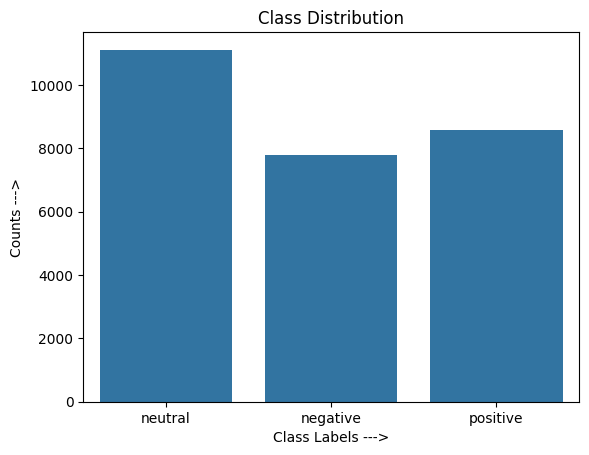

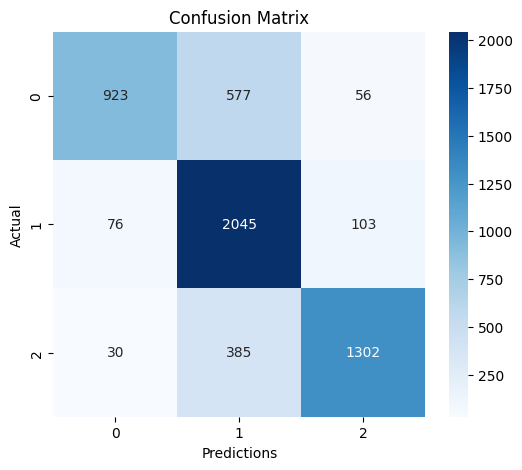

In [66]:
# visualization
# 1. Class Levels
sns.countplot(x=y)
plt.title("Class Distribution")
plt.xlabel("Class Labels --->")
plt.ylabel("Counts --->")
plt.show()

# 2. Confusion Matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predictions")
plt.ylabel("Actual")
plt.show()